In [1]:
import numpy as np
import math
from qutip import create, basis, sigmaz, sigmax, sigmay
import matplotlib.pyplot as plt
import pandas as pd
from Please_Graduate import Quantum_System, Models

#experimental setting
omega_r = 2*np.pi*0.80
kai = -2*np.pi*0.18

#model fit setting
epochs = 100
batch_size = 128


In [2]:
# 1. qubit = 0, cavity =1, time 0 to 1 by n_times = 100
experiment_1 = Quantum_System(omega_r=omega_r, kai=kai, qubit_initial=0, cavity_initial=1, superposition=False)
df_1 = experiment_1.monte_carlo(n_sample=100,  n_times = 100, t_i=0, t_f=1)
df_1.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0.000000,0.0,0.0,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010101,0.0,0.0,0.81,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.020202,0.0,0.0,0.29,0.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6917 - binary_crossentropy: 0.6917 - val_loss: 0.6907 - val_binary_crossentropy: 0.6907
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6903 - binary_crossentropy: 0.6903 - val_loss: 0.6895 - val_binary_crossentropy: 0.6895
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 0.6879 - binary_crossentropy: 0.6879 - val_loss: 0.6884 - val_binary_crossentropy: 0.6884
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6871 - binary_crossentropy: 0.6871 - val_loss: 0.6874 - val_binary_crossentropy: 0.6874
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6859 - binary_crossentropy: 0.6859 - val_loss: 0.6862 - val_binary_crossentropy: 0.6862
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6861 - binary_crossentropy: 0.6861 - val_loss: 0.6848 - val_binary_crossentropy: 0.6848
Epoch 7/100
1/1 [=============

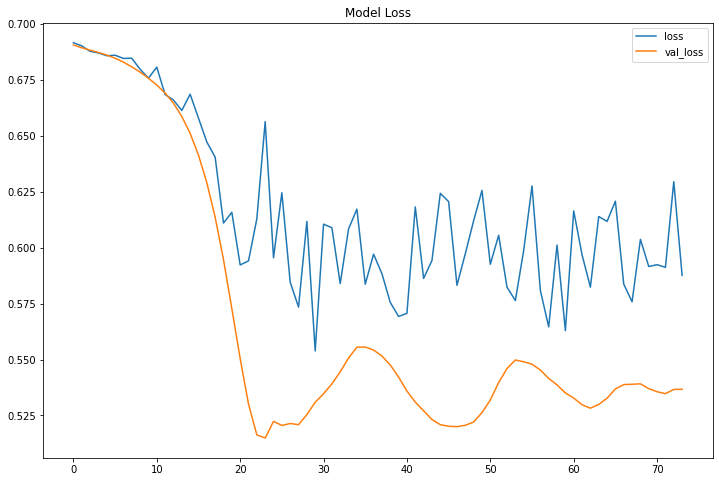

In [3]:
train_feature_1, train_label_1, test_feature_1, test_label_1 = experiment_1.preprocess(data = df_1, split_ratio=0.75, time_step=10)
model1 = Models(df_1, train_feature_1, train_label_1, test_feature_1, test_label_1)
lstm = model1.LSTM()
lstm, history = model1.fit(lstm,epochs=epochs, batch_size = batch_size, show_loss = True)

1/1 [==============================] - 0s 2ms/step - loss: 0.5243 - binary_crossentropy: 0.5243
test loss: 0.5242847800254822


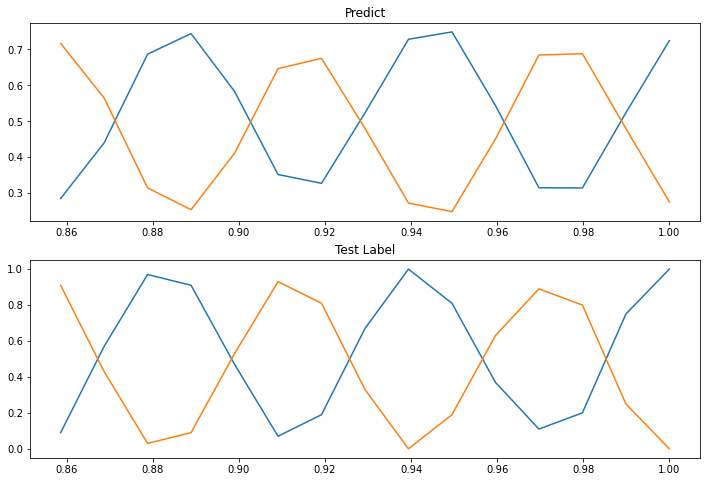

In [4]:
model1.predict(lstm,show_plot=True)

In [5]:
# 2. qubit = 0 and cavity =1 with Superposition state, time 0 to 1 by n_times = 1000
experiment_2 = Quantum_System(omega_r=omega_r, kai=kai, qubit_initial=0, cavity_initial=1, superposition=True)
df_2 = experiment_2.monte_carlo(n_sample=100,  n_times = 100, t_i=0, t_f=1)
df_2.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0.000000,0.0,0.0,0.44,0.00,0.56,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010101,0.0,0.0,0.38,0.11,0.45,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.020202,0.0,0.0,0.18,0.42,0.24,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6852 - binary_crossentropy: 0.6852 - val_loss: 0.6774 - val_binary_crossentropy: 0.6774
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6778 - binary_crossentropy: 0.6778 - val_loss: 0.6696 - val_binary_crossentropy: 0.6696
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6693 - binary_crossentropy: 0.6693 - val_loss: 0.6617 - val_binary_crossentropy: 0.6617
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6615 - binary_crossentropy: 0.6615 - val_loss: 0.6533 - val_binary_crossentropy: 0.6533
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 0.6528 - binary_crossentropy: 0.6528 - val_loss: 0.6444 - val_binary_crossentropy: 0.6444
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6444 - binary_crossentropy: 0.6444 - val_loss: 0.6348 - val_binary_crossentropy: 0.6348
Epoch 7/100
1/1 [=============

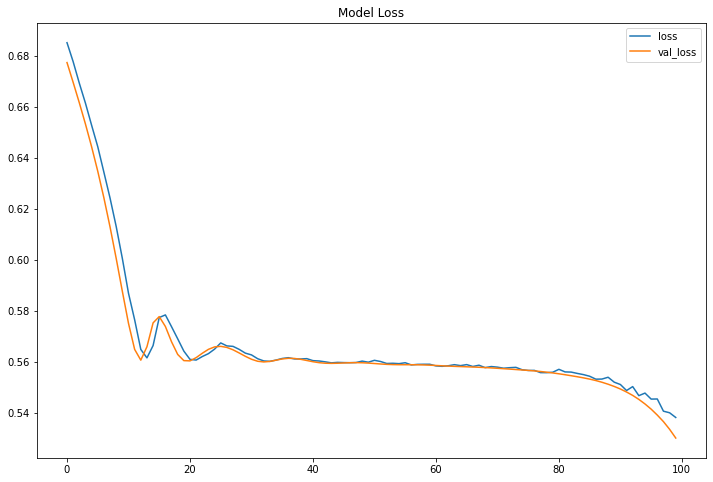

In [6]:
train_feature_2, train_label_2, test_feature_2, test_label_2 = experiment_2.preprocess(data = df_2, split_ratio=0.75, time_step=10)

model2 = Models(df_2, train_feature_2, train_label_2, test_feature_2, test_label_2)
lstm_2 = model2.LSTM()
lstm_2, history = model2.fit(lstm_2,epochs=epochs, batch_size = batch_size, show_loss = True)

1/1 [==============================] - 0s 17ms/step - loss: 0.5289 - binary_crossentropy: 0.5289
test loss: 0.5289371013641357


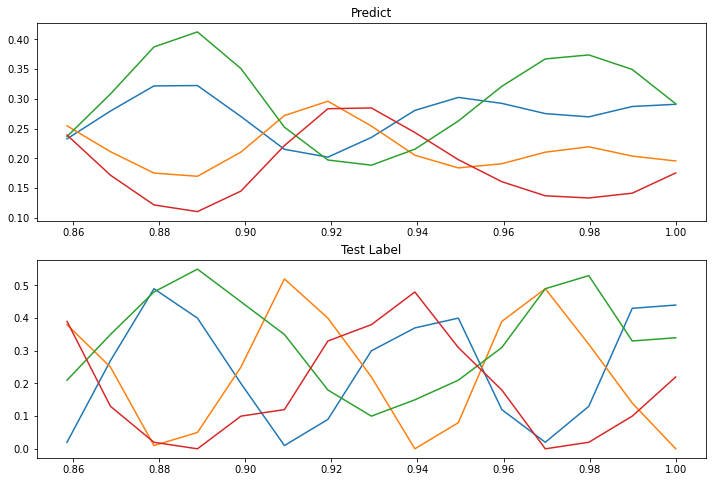

In [7]:
model2.predict(lstm_2, show_plot= True)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.7043 - binary_crossentropy: 0.7043 - val_loss: 0.6930 - val_binary_crossentropy: 0.6930
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6926 - binary_crossentropy: 0.6926 - val_loss: 0.6818 - val_binary_crossentropy: 0.6818
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 0.6817 - binary_crossentropy: 0.6817 - val_loss: 0.6711 - val_binary_crossentropy: 0.6711
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 0.6708 - binary_crossentropy: 0.6708 - val_loss: 0.6605 - val_binary_crossentropy: 0.6605
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 0.6598 - binary_crossentropy: 0.6598 - val_loss: 0.6498 - val_binary_crossentropy: 0.6498
Epoch 6/100
1/1 [==============================] - 0s 54ms/step - loss: 0.6502 - binary_crossentropy: 0.6502 - val_loss: 0.6388 - val_binary_crossentropy: 0.6388
Epoch 7/100
1/1 [=============

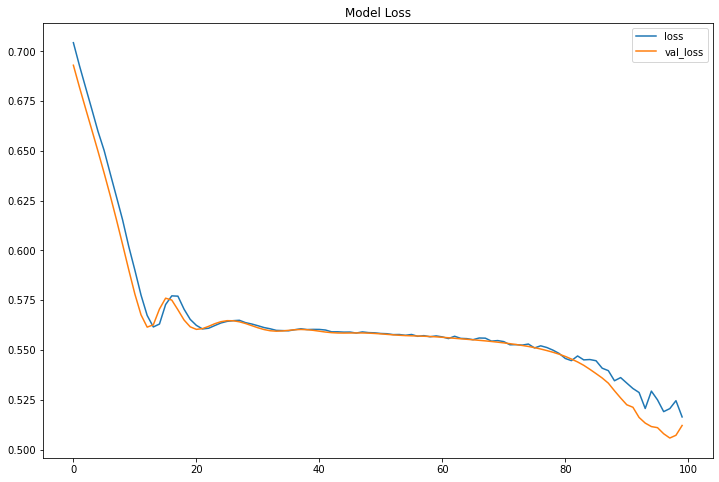

In [8]:
bilstm = model2.BiLSTM()
bilstm, history = model2.fit(bilstm,epochs=epochs, batch_size = batch_size, show_loss = True)

1/1 [==============================] - 0s 16ms/step - loss: 0.4963 - binary_crossentropy: 0.4963
test loss: 0.49632570147514343


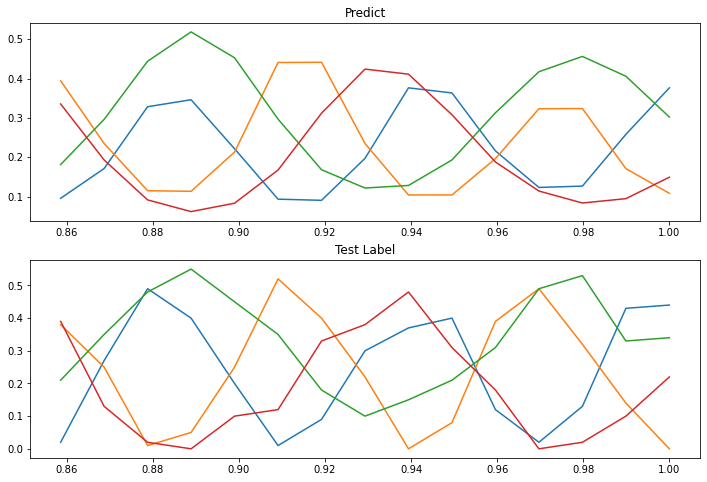

In [9]:
model2.predict(bilstm,show_plot=True)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6285 - binary_crossentropy: 0.6285 - val_loss: 0.5747 - val_binary_crossentropy: 0.5747
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 0.5685 - binary_crossentropy: 0.5685 - val_loss: 0.5725 - val_binary_crossentropy: 0.5725
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 0.5737 - binary_crossentropy: 0.5737 - val_loss: 0.5713 - val_binary_crossentropy: 0.5713
Epoch 4/100
1/1 [==============================] - 0s 40ms/step - loss: 0.5691 - binary_crossentropy: 0.5691 - val_loss: 0.5653 - val_binary_crossentropy: 0.5653
Epoch 5/100
1/1 [==============================] - 0s 45ms/step - loss: 0.5647 - binary_crossentropy: 0.5647 - val_loss: 0.5618 - val_binary_crossentropy: 0.5618
Epoch 6/100
1/1 [==============================] - 0s 44ms/step - loss: 0.5603 - binary_crossentropy: 0.5603 - val_loss: 0.5648 - val_binary_crossentropy: 0.5648
Epoch 7/100
1/1 [=============

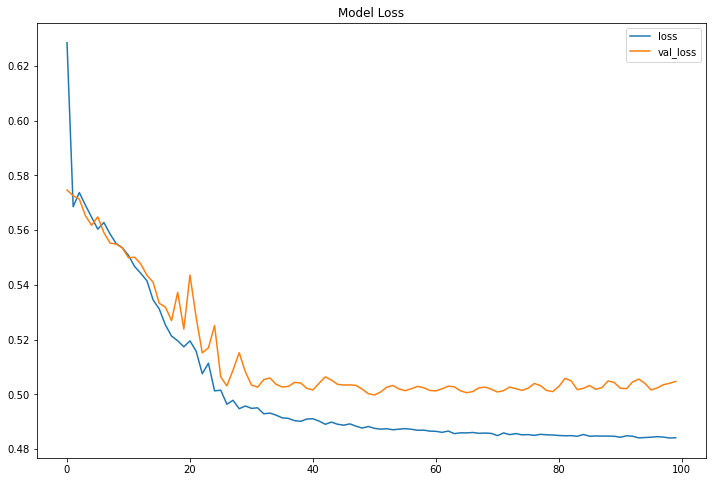

In [10]:
#transformer setting
key_dim = 256
num_heads = 4
ff_dim = 128
num_blocks = 1

transformer = model2.Transfomer(key_dim=key_dim, num_heads=num_heads, ff_dim = ff_dim, num_blocks=num_blocks)
transformer, history = model2.fit(transformer,epochs=epochs, batch_size = batch_size, show_loss = True)

1/1 [==============================] - 0s 21ms/step - loss: 0.4849 - binary_crossentropy: 0.4849
test loss: 0.4849306643009186


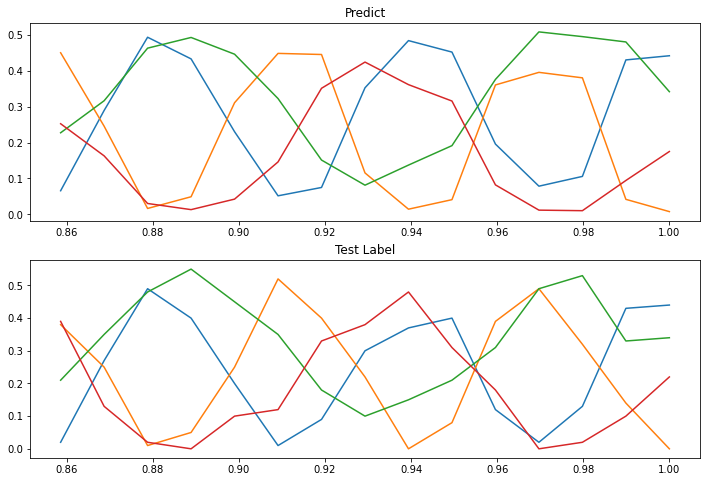

In [11]:
model2.predict(transformer)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.6710 - binary_crossentropy: 0.6710 - val_loss: 0.5731 - val_binary_crossentropy: 0.5731
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 0.5733 - binary_crossentropy: 0.5733 - val_loss: 0.5605 - val_binary_crossentropy: 0.5605
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 0.5584 - binary_crossentropy: 0.5584 - val_loss: 0.5617 - val_binary_crossentropy: 0.5617
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 0.5593 - binary_crossentropy: 0.5593 - val_loss: 0.5623 - val_binary_crossentropy: 0.5623
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 0.5601 - binary_crossentropy: 0.5601 - val_loss: 0.5594 - val_binary_crossentropy: 0.5594
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 0.5586 - binary_crossentropy: 0.5586 - val_loss: 0.5539 - val_binary_crossentropy: 0.5539
Epoch 7/100
1/1 [=============

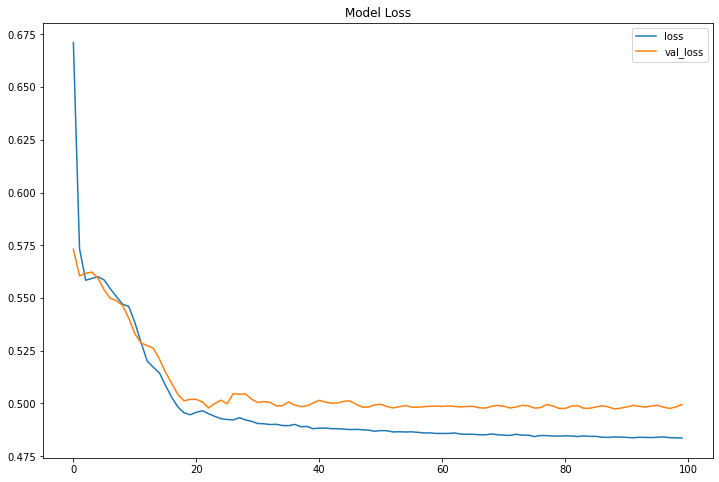

In [12]:
transformer_conv = model2.Transfomer_conv(key_dim=key_dim, num_heads=num_heads, ff_dim = ff_dim, num_blocks=num_blocks)
transformer_conv, history = model2.fit(transformer_conv,epochs=epochs, batch_size = batch_size, show_loss = True)

1/1 [==============================] - 0s 18ms/step - loss: 0.4857 - binary_crossentropy: 0.4857
test loss: 0.4856957793235779


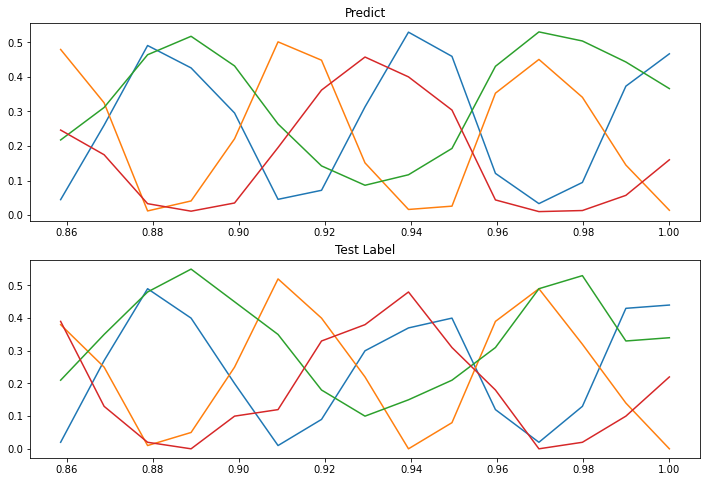

In [13]:
model2.predict(transformer_conv)